# Plots

This note book consists of
- functions which should used in every plot to ensure the same style in every plot (good for readers)
- two cells for every experiment file
    - first cell sets/resets data according to experiments files
    - second cell reads data and crates plots

In [1]:
from os import listdir
from os.path import isfile, join
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pprint
import os

### config

In [2]:
results_directory = "../data/results/"

### load data
load all result files, individual data will be selected later

In [3]:
results_meta = {}

# get files and ids
for name in listdir(results_directory):
    path = join(results_directory, name)
    if isfile(path):
        id = name[:-7]
        results_meta[id] = {"result_pickle":path}

# add data
for key in results_meta:
    with open(results_meta[key]["result_pickle"], 'rb') as handle:
        results_meta[key]["data"] = pickle.load(handle)

# print info
for key in results_meta: 
    print(
        key, " ",
        results_meta[key]["result_pickle"], " ",
        type(results_meta[key]["data"]), " ",
        len(results_meta[key]["data"])
    )  

twitter_diff_dist   ../data/results/twitter_diff_dist.pickle   <class 'tuple'>   3
twitter_drift_induction   ../data/results/twitter_drift_induction.pickle   <class 'dict'>   3
amazon_diff_classes   ../data/results/amazon_diff_classes.pickle   <class 'dict'>   3
amazon_same_dist   ../data/results/amazon_same_dist.pickle   <class 'dict'>   3
twitter_same_dist   ../data/results/twitter_same_dist.pickle   <class 'dict'>   3
twitter_diff_classes   ../data/results/twitter_diff_classes.pickle   <class 'dict'>   3
amazon_drift_induction   ../data/results/amazon_drift_induction.pickle   <class 'dict'>   3


### plot functions
functions to ensure same layout in every plot

In [4]:
def get_label(detector_name):
    mappings = {
        "cdbd" : "CDBD",
        "csdd" : "Cosine Similarity",
        "kts" : "Kernel Two Sample",
        "aks" : "KS",
        "lsdd" : "LSDD",
        "ammd" : "MMD",
    }
    if(detector_name in mappings):
        return mappings[detector_name]
    else:
        print("Unknown detector label:", detector_name)
        return detector_name


def get_plot_config(detector_label, config={}):
    # detector_label: See get_label(detector_name)
    # config:         See https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
    
    # Often similar: Kernel Two Sample, LSDD, MMD
    # https://matplotlib.org/stable/tutorials/colors/colors.html
    # 'tab:blue''tab:orange''tab:green''tab:red''tab:purple''tab:brown''tab:pink''tab:gray''tab:olive''tab:cyan'
    # '-' or 'solid' / '--' or 'dashed' / '-.' or 'dashdot' / ':' or 'dotted'
    linewidth = 1.6 #1.2
    linewidth_thicker = 2 #1.6
    linewidth_thick = 2.4 #2
    if(detector_label == "CDBD"):
        config.update(color='tab:green',  linestyle='-',  linewidth=linewidth)
    elif(detector_label == "Cosine Similarity"):
        config.update(color='tab:gray',   linestyle=':',  linewidth=linewidth_thick)
    elif(detector_label == "Kernel Two Sample"): # CLOSE ONE
        config.update(color='tab:red',    linestyle='-',  linewidth=linewidth_thicker)
    elif(detector_label == "KS"):
        config.update(color='tab:purple', linestyle='--', linewidth=linewidth)
    elif(detector_label == "LSDD"): # CLOSE ONE
        config.update(color='tab:orange', linestyle='-.', linewidth=linewidth_thicker)
    elif(detector_label == "MMD"): # CLOSE ONE
        config.update(color='tab:blue',   linestyle='--', linewidth=linewidth_thicker)
    else: # Not used in default cases
        config.update(color='tab:olive',  linestyle='-',  linewidth=linewidth)
    return config


def plot_diff_dist(plot_data, legend_loc="upper center", ylim_top=1.03, pdf_filename=None):
    
    # sort by label for legend
    labels_to_detectors = {}
    for detector in plot_data:
        labels_to_detectors[get_label(detector)] = detector

    # add lines
    fig, ax = plt.subplots()
    for label in sorted(labels_to_detectors):
        detector = labels_to_detectors[label]
        ax.plot(plot_data[detector], label=label, **get_plot_config(label, {}))

    # plot config
    ax.grid(color='#dddddd')
    ax.set_ylim([-0.03, ylim_top])
    plt.ylabel('p-value', fontsize="large")
    #plt.xlabel('x axis', fontsize="xx-large")
    #plt.xticks(ticks=range(0,3), labels=['124 + 24h', '192 + 24h', '480 + 24h'])
    #plt.xticks(ticks=range(0,3), labels=[r'$t_2$', r'$t_{debate}$', r'$t_{election}$'], fontsize="large")
    #plt.xticks(ticks=range(0,3), labels=['t$_\mathrm{\,2}$', 't$_\mathrm{\,debate}$', 't$_\mathrm{\,election}$'])
    plt.xticks(ticks=range(0,3), labels=['t$_\mathrm{\,2}$', 't$_\mathrm{\ d\,e\,b\,a\,t\,e}$', 't$_\mathrm{\ e\,l\,e\,c\,t\,i\,o\,n}$'], fontsize="large")

    
    #plt.xlabel('Primary T$_{eff}$')
    #            Primary T$_\mathrm{eff}$' 
    
    plt.legend(loc=legend_loc)

    # save
    if pdf_filename is not None:
        fig.tight_layout()
        print("Saving", pdf_filename)
        fig.savefig(pdf_filename, format='pdf')

    plt.show()

# twitter_diff_dist

In [5]:
# set config from notebook
modes = ['bert_768', 'bow_50', 'bow_768']
detectors = {
    'csdd': "",
    'kts' : "",
    'aks' : "",
    'ammd': "",
    'lsdd': "",
    'cdbd': "",
}
result_pickle = results_meta["twitter_diff_dist"]["result_pickle"]
try:
    del results
except NameError:
    pass

Loading result pickle:  ../data/results/twitter_diff_dist.pickle
bert_768
Saving ../figures/by_dataset/twitter_bert_768_diff_dist_all.pdf


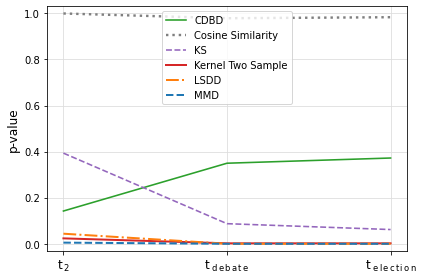

bow_50
Saving ../figures/by_dataset/twitter_bow_50_diff_dist_all.pdf


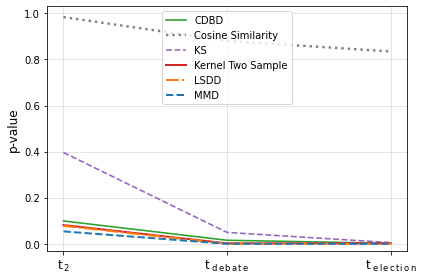

bow_768
Saving ../figures/by_dataset/twitter_bow_768_diff_dist_all.pdf


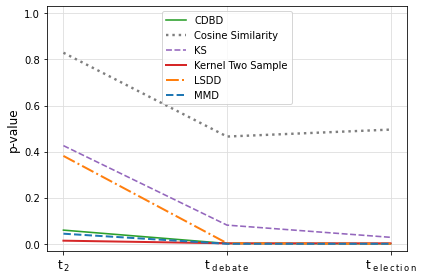

In [6]:
# load results if not existing
try:
    results
except NameError:
    print('Loading result pickle: ', result_pickle)
    with open(result_pickle, 'rb') as handle:
        (results_124, results_192, results_480) = pickle.load(handle)

# plot
data = {}
for mode in modes:
    print(mode)
    data[mode] = {}
    for detector in detectors:
        data[mode][detector] = [np.mean(r[mode][detector]['predictions']) for r in (results_124, results_192, results_480)]

    #if(mode == "bow_768"):
    #    plot_diff_dist(data[mode], pdf_filename="../figures/by_dataset/twitter_" + mode + "_diff_dist_all.pdf", legend_loc="upper right")
    #else:
    plot_diff_dist(data[mode], pdf_filename="../figures/by_dataset/twitter_" + mode + "_diff_dist_all.pdf")